___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 

# Import esential Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (15,8)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.model_selection import cross_validate
import sklearn
sklearn.metrics.SCORERS.keys()
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve
from scipy.special import expit, logit

# Ingest the data to notebook

In [4]:
df = pd.read_csv('heart.csv')

In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.200,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.200,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.400,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.200,1,1,3,0


In [6]:
df.shape

(303, 14)

In [7]:
df = pd.get_dummies(df,columns=["cp","restecg","slope","thal"], drop_first=True,)


# EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    int64  
 1   sex        303 non-null    int64  
 2   trestbps   303 non-null    int64  
 3   chol       303 non-null    int64  
 4   fbs        303 non-null    int64  
 5   thalach    303 non-null    int64  
 6   exang      303 non-null    int64  
 7   oldpeak    303 non-null    float64
 8   ca         303 non-null    int64  
 9   target     303 non-null    int64  
 10  cp_1       303 non-null    uint8  
 11  cp_2       303 non-null    uint8  
 12  cp_3       303 non-null    uint8  
 13  restecg_1  303 non-null    uint8  
 14  restecg_2  303 non-null    uint8  
 15  slope_1    303 non-null    uint8  
 16  slope_2    303 non-null    uint8  
 17  thal_1     303 non-null    uint8  
 18  thal_2     303 non-null    uint8  
 19  thal_3     303 non-null    uint8  
dtypes: float64

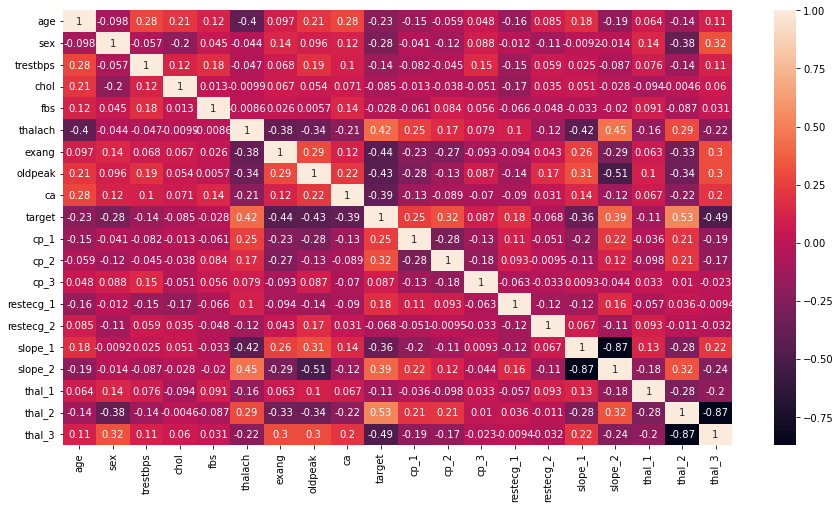

In [9]:
sns.heatmap(df.corr(), annot=True);


In [10]:
#multicollinearity control
df_numeric = df.select_dtypes(include ="number")
df_numeric.corr()[(df_numeric.corr()>= 0.9) & (df_numeric.corr() < 1)].any().any()

False

In [93]:
df.describe()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_2,thal_3
count,302.000,302.000,302.000,302.000,302.000,302.000,302.000,302.000,302.000,302.000,302.000,302.000,302.000,302.000,302.000,302.000,302.000,302.000,302.000,302.000
mean,54.325,0.685,131.679,245.212,0.149,149.613,0.328,1.038,0.732,0.543,0.166,0.285,0.076,0.503,0.013,0.460,0.470,0.060,0.550,0.384
std,9.068,0.465,17.541,48.568,0.357,22.935,0.470,1.163,1.023,0.499,0.372,0.452,0.266,0.501,0.115,0.499,0.500,0.237,0.498,0.487
min,29.000,0.000,94.000,126.000,0.000,71.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,47.250,0.000,120.000,211.000,0.000,133.250,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,55.000,1.000,130.000,240.000,0.000,152.500,0.000,0.800,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000
75%,61.000,1.000,140.000,274.000,0.000,166.000,1.000,1.600,1.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,1.000
max,77.000,1.000,200.000,417.000,1.000,202.000,1.000,6.200,4.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [100]:
df['ca'].value_counts()

0    174
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

<AxesSubplot:xlabel='target', ylabel='Count'>

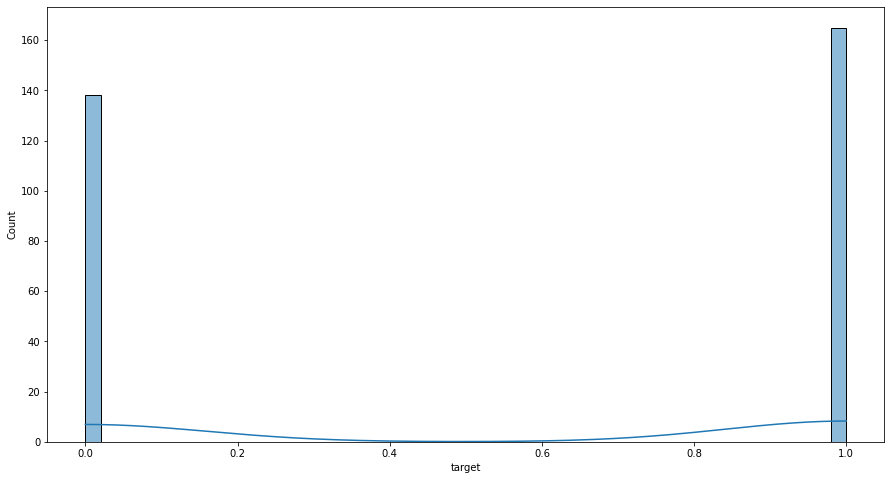

In [11]:
sns.histplot(df.target, bins = 50, kde= True)

<AxesSubplot:xlabel='chol'>

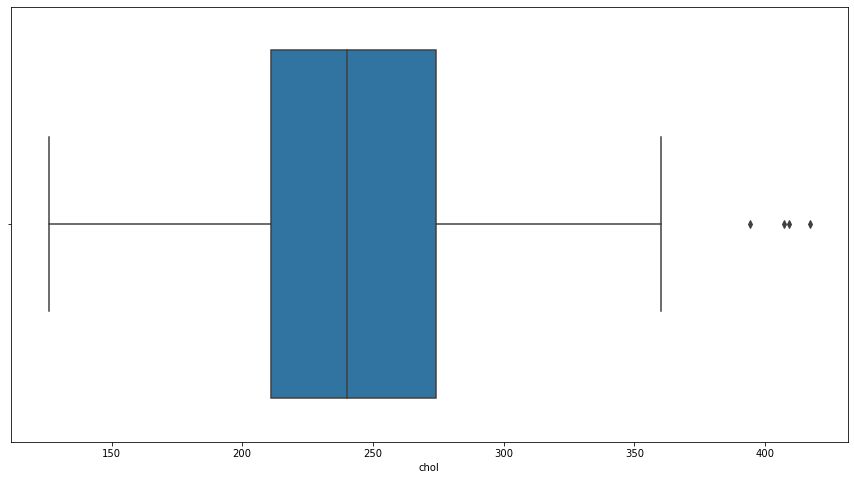

In [102]:
sns.boxplot('chol',data = df)

In [91]:
df = df[df['chol']< 500.0]

<AxesSubplot:xlabel='ca'>

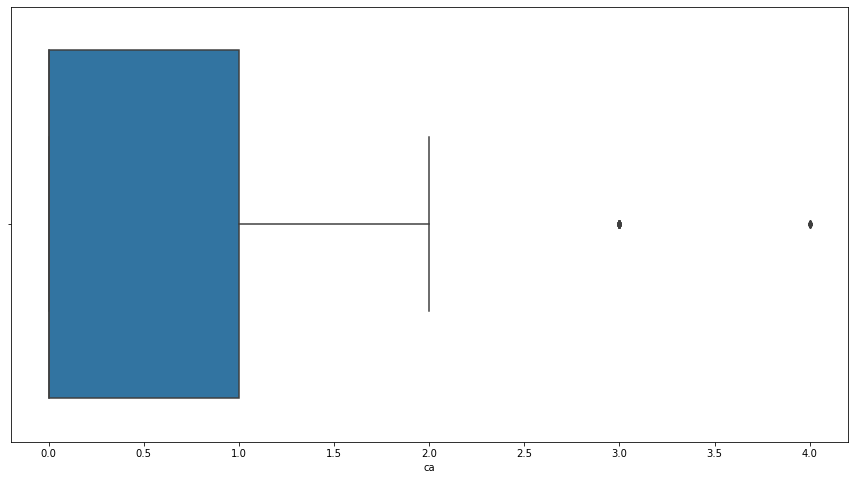

In [103]:
sns.boxplot('ca',data = df)

In [104]:
df = df[df['ca']< 4.0]

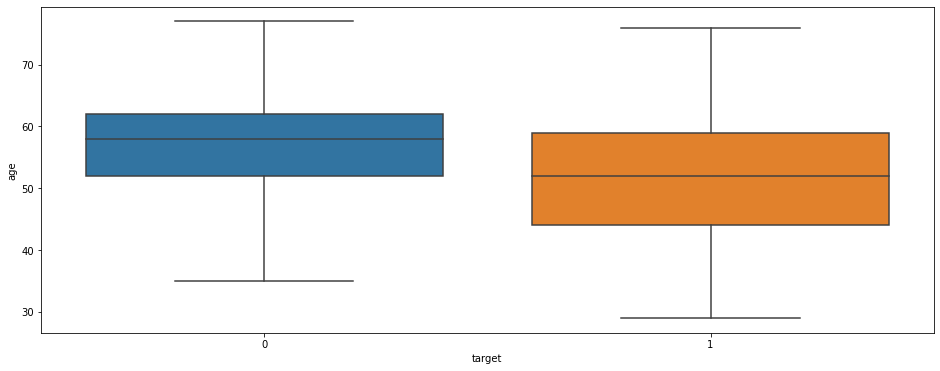

In [12]:
plt.figure(figsize=(16,6))
sns.boxplot(x="target", y="age", data=df, whis=3)
plt.show()

In [13]:
corr_by_target = df.corr()["target"].sort_values()[:-1]
corr_by_target

thal_3      -0.486
exang       -0.437
oldpeak     -0.431
ca          -0.392
slope_1     -0.362
sex         -0.281
age         -0.225
trestbps    -0.145
thal_1      -0.107
chol        -0.085
restecg_2   -0.068
fbs         -0.028
cp_3         0.087
restecg_1    0.175
cp_1         0.246
cp_2         0.317
slope_2      0.394
thalach      0.422
thal_2       0.527
Name: target, dtype: float64

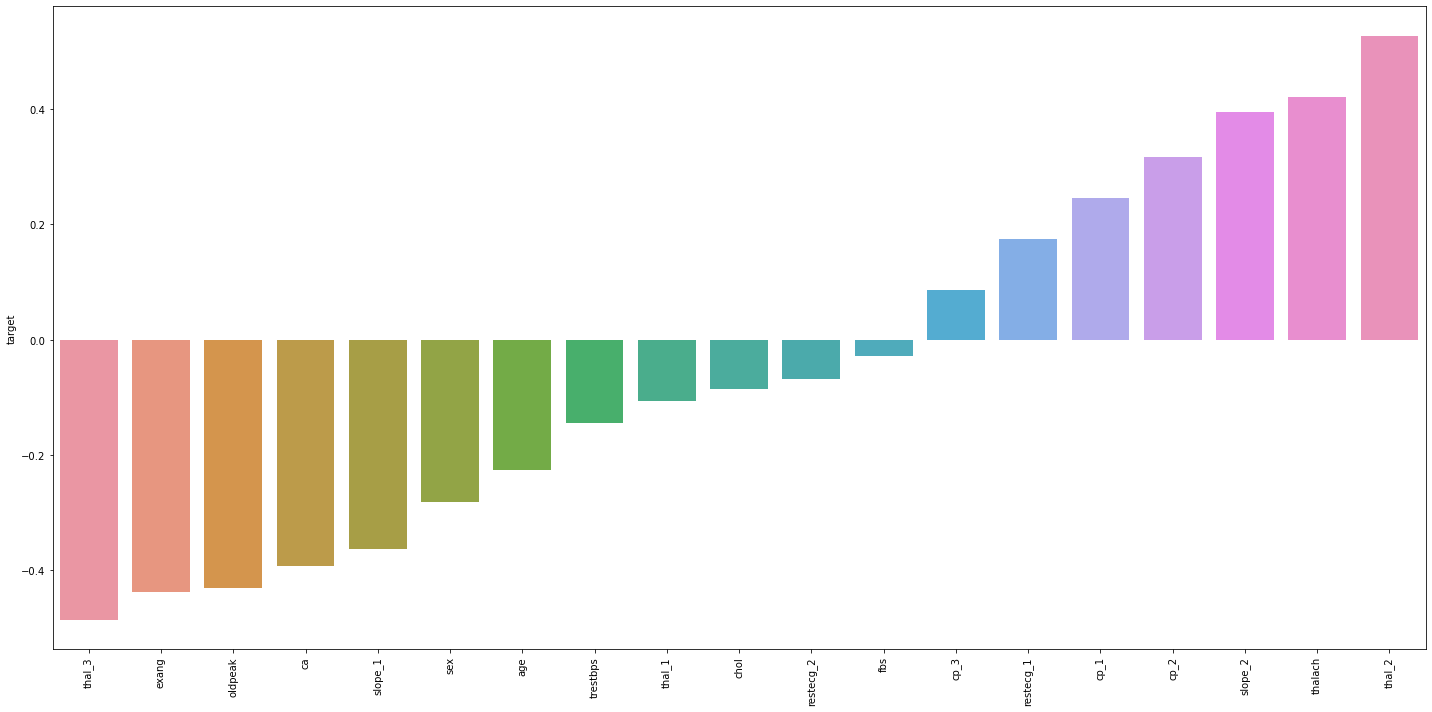

In [14]:
plt.figure(figsize = (20,10))
sns.barplot(x = corr_by_target.index, y = corr_by_target)
plt.xticks(rotation=90)
plt.tight_layout();

# Data Preprocessing

In [15]:
X = df.drop(columns='target')
y = df.target

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
scaler = StandardScaler()

In [18]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement Logistic Regression and Evaluate

In [19]:
log_model = LogisticRegression()

In [20]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [21]:
df.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'target', 'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2',
       'slope_1', 'slope_2', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [22]:
log_model.coef_

array([[ 0.03901468, -0.55245243, -0.19152816, -0.07303009,  0.0442966 ,
         0.21531777, -0.48444261, -0.58275054, -0.88262384,  0.19161507,
         0.90247593,  0.50000709,  0.40942234, -0.01600998, -0.19320018,
         0.34003357,  0.08129539,  0.31128625, -0.42635214]])

In [23]:
y_pred = log_model.predict(X_test_scaled)
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [24]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[0.95477447, 0.04522553],
       [0.50722835, 0.49277165],
       [0.15150054, 0.84849946],
       [0.98687087, 0.01312913],
       [0.02689592, 0.97310408],
       [0.03965619, 0.96034381],
       [0.47329593, 0.52670407],
       [0.99649186, 0.00350814],
       [0.99098132, 0.00901868],
       [0.21378988, 0.78621012],
       [0.4090248 , 0.5909752 ],
       [0.875751  , 0.124249  ],
       [0.06906603, 0.93093397],
       [0.97308966, 0.02691034],
       [0.01502721, 0.98497279],
       [0.03782762, 0.96217238],
       [0.02190597, 0.97809403],
       [0.91554936, 0.08445064],
       [0.99243376, 0.00756624],
       [0.98075314, 0.01924686],
       [0.54337384, 0.45662616],
       [0.96367117, 0.03632883],
       [0.55017006, 0.44982994],
       [0.18751265, 0.81248735],
       [0.04490492, 0.95509508],
       [0.38060879, 0.61939121],
       [0.0789043 , 0.9210957 ],
       [0.4238083 , 0.5761917 ],
       [0.99422091, 0.00577909],
       [0.06909163, 0.93090837],
       [0.

In [25]:
accuracy_score(y_test,y_pred)

0.881578947368421

In [26]:
precision_score(y_test, y_pred)

0.8809523809523809

In [27]:
recall_score(y_test, y_pred)

0.9024390243902439

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        35
           1       0.88      0.90      0.89        41

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



In [29]:
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       103
           1       0.85      0.90      0.88       124

    accuracy                           0.86       227
   macro avg       0.86      0.85      0.86       227
weighted avg       0.86      0.86      0.86       227



In [30]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.006,0.004,0.739,0.750,0.750,0.750
2,0.006,0.003,0.826,0.833,0.833,0.833
3,0.005,0.003,0.913,0.917,0.917,0.917
4,0.005,0.003,0.826,0.909,0.769,0.833
5,0.005,0.003,0.739,0.706,0.923,0.800
6,0.005,0.003,0.739,0.733,0.846,0.786
7,0.005,0.003,0.870,0.812,1.000,0.897
8,0.007,0.005,0.955,0.923,1.000,0.960
9,0.004,0.003,0.727,0.800,0.667,0.727
10,0.005,0.003,0.864,0.846,0.917,0.880


In [31]:
df_scores.mean()[2:]

test_accuracy    0.820
test_precision   0.823
test_recall      0.862
test_f1          0.838
dtype: float64

In [32]:
print("Test Set")
print(classification_report(y_test,y_pred))
print("Train Set\n")
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train,y_train_pred))

Test Set
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        35
           1       0.88      0.90      0.89        41

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76

Train Set

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       103
           1       0.85      0.90      0.88       124

    accuracy                           0.86       227
   macro avg       0.86      0.85      0.86       227
weighted avg       0.86      0.86      0.86       227



### Grid search

In [33]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
class_weight= ["balanced", None] 
# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies 
# in the input data
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}


grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall",   #f1_0 = make_scorer(f1_score, pos_label =0)
                          n_jobs = -1)

In [34]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [35]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='recall')

In [36]:
grid_model.best_params_

{'C': 0.42813323987193935,
 'class_weight': None,
 'penalty': 'l1',
 'solver': 'saga'}

In [37]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[28  7]
 [ 4 37]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.84        35
           1       0.84      0.90      0.87        41

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.85        76


Train_Set
[[ 81  22]
 [ 11 113]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       103
           1       0.84      0.91      0.87       124

    accuracy                           0.85       227
   macro avg       0.86      0.85      0.85       227
weighted avg       0.86      0.85      0.85       227



# Implement KNN and Evaluate

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=54)

In [40]:
scaler = StandardScaler()

In [41]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0, 0.5, 'Error Rate')

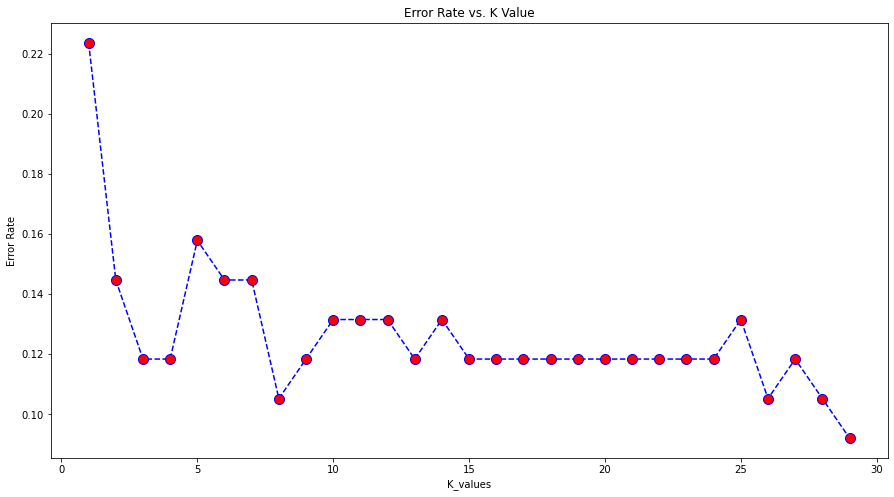

In [43]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

In [44]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set\n")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set\n")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [45]:
knn = KNeighborsClassifier(n_neighbors=29)

knn.fit(X_train_scaled,y_train)
print('WITH K=29\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=29

Test_Set

[[30  6]
 [ 1 39]]
              precision    recall  f1-score   support

           0       0.97      0.83      0.90        36
           1       0.87      0.97      0.92        40

    accuracy                           0.91        76
   macro avg       0.92      0.90      0.91        76
weighted avg       0.91      0.91      0.91        76


Train_Set

[[ 80  22]
 [ 20 105]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       102
           1       0.83      0.84      0.83       125

    accuracy                           0.81       227
   macro avg       0.81      0.81      0.81       227
weighted avg       0.81      0.81      0.81       227



### Cross validate for optimal k value

In [46]:
model = KNeighborsClassifier(n_neighbors=29)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.001,0.006,0.913,1.000,0.833,0.909
2,0.001,0.006,0.783,0.818,0.750,0.783
3,0.001,0.005,0.826,1.000,0.692,0.818
4,0.001,0.005,0.739,0.733,0.846,0.786
5,0.001,0.005,0.652,0.692,0.692,0.692
6,0.001,0.005,0.826,0.846,0.846,0.846
7,0.000,0.005,0.826,0.846,0.846,0.846
8,0.001,0.004,0.818,0.750,1.000,0.857
9,0.000,0.008,0.818,0.750,1.000,0.857
10,0.001,0.005,0.864,0.909,0.833,0.870


In [47]:
df_scores.mean()[2:]

test_accuracy    0.807
test_precision   0.835
test_recall      0.834
test_f1          0.826
dtype: float64

###  Gridsearch Method for Choosing Reasonable K Values

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
knn_grid = KNeighborsClassifier()

In [50]:
k_values= range(1,30)

In [51]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}

In [52]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'f1')

In [53]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [54]:
knn_grid_model.best_params_

{'n_neighbors': 16, 'p': 2, 'weights': 'distance'}

In [55]:
print('WITH K=16\n')
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=16

Test_Set

[[29  7]
 [ 2 38]]
              precision    recall  f1-score   support

           0       0.94      0.81      0.87        36
           1       0.84      0.95      0.89        40

    accuracy                           0.88        76
   macro avg       0.89      0.88      0.88        76
weighted avg       0.89      0.88      0.88        76


Train_Set

[[102   0]
 [  0 125]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       125

    accuracy                           1.00       227
   macro avg       1.00      1.00      1.00       227
weighted avg       1.00      1.00      1.00       227



# Visually compare models based on your chosen metric

# Chose best model and make a random prediction 

In [56]:
import pickle

In [57]:
scaler = StandardScaler()

In [58]:
scaler.fit(X)

StandardScaler()

In [59]:
X_scaled = scaler.transform(X)

In [60]:
final_knn_model = KNeighborsClassifier(n_neighbors=16)

In [61]:
pickle.dump(final_knn_model, open('knn_final.pkl', 'wb'))

In [62]:
pickle.dump(scaler, open('scaler_knn.pkl', 'wb'))

### Predict new observations

In [63]:
loaded_scaler = pickle.load(open('scaler_knn.pkl', 'rb'))

In [64]:
loaded_model = pickle.load(open('knn_final.pkl', 'rb'))

In [65]:
X.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2', 'slope_1',
       'slope_2', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [78]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    int64  
 1   sex        303 non-null    int64  
 2   trestbps   303 non-null    int64  
 3   chol       303 non-null    int64  
 4   fbs        303 non-null    int64  
 5   thalach    303 non-null    int64  
 6   exang      303 non-null    int64  
 7   oldpeak    303 non-null    float64
 8   ca         303 non-null    int64  
 9   cp_1       303 non-null    uint8  
 10  cp_2       303 non-null    uint8  
 11  cp_3       303 non-null    uint8  
 12  restecg_1  303 non-null    uint8  
 13  restecg_2  303 non-null    uint8  
 14  slope_1    303 non-null    uint8  
 15  slope_2    303 non-null    uint8  
 16  thal_1     303 non-null    uint8  
 17  thal_2     303 non-null    uint8  
 18  thal_3     303 non-null    uint8  
dtypes: float64(1), int64(8), uint8(10)
memory usage: 2

In [66]:
X.describe()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_2,thal_3
count,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000
mean,54.366,0.683,131.624,246.264,0.149,149.647,0.327,1.040,0.729,0.165,0.287,0.076,0.502,0.013,0.462,0.469,0.059,0.548,0.386
std,9.082,0.466,17.538,51.831,0.356,22.905,0.470,1.161,1.023,0.372,0.453,0.265,0.501,0.114,0.499,0.500,0.237,0.499,0.488
min,29.000,0.000,94.000,126.000,0.000,71.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,47.500,0.000,120.000,211.000,0.000,133.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,55.000,1.000,130.000,240.000,0.000,153.000,0.000,0.800,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000
75%,61.000,1.000,140.000,274.500,0.000,166.000,1.000,1.600,1.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,1.000
max,77.000,1.000,200.000,564.000,1.000,202.000,1.000,6.200,4.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [79]:
X['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [67]:
df

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.300,0,1,0,0,1,0,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.500,0,1,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.400,0,1,1,0,0,0,0,0,1,0,1,0
3,56,1,120,236,0,178,0,0.800,0,1,1,0,0,1,0,0,1,0,1,0
4,57,0,120,354,0,163,1,0.600,0,1,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.200,0,0,0,0,0,1,0,1,0,0,0,1
299,45,1,110,264,0,132,0,1.200,0,0,0,0,1,1,0,1,0,0,0,1
300,68,1,144,193,1,141,0,3.400,2,0,0,0,0,1,0,1,0,0,0,1
301,57,1,130,131,0,115,1,1.200,1,0,0,0,0,1,0,1,0,0,0,1


In [80]:
new_obs = {'age': list(np.random.randint(8,70,10)),
           'sex': list(np.random.randint(0,2,10)),
           'trestbps' : list(np.random.randint(70,140,10)),
           'chol' : list(np.random.randint(120,270,10)),
           'fbs' : list(np.random.randint(0,2,10)),
           'thalach' : list(np.random.randint(70,200,10)),
           'exang' : list(np.random.randint(0,2,10)),
           'oldpeak' : list(np.random.uniform(0,7,10)),
           'ca' : list(np.random.randint(0,5,10)),
           'cp_1' : [1,0,1,0,0,0,1,1,0,0],
           'cp_2' : [0,1,0,0,1,0,0,0,0,1],
           'cp_3' : [0,0,0,1,0,1,0,0,1,0],
           'restecg_1' : [0,0,1,0,1,0,0,1,0,1],
           'restecg_2' : [1,0,0,0,0,1,1,0,1,0],
           'slope_1' : [1,1,0,1,0,0,0,1,0,1],
           'slope_2' : [0,0,1,0,1,1,1,0,1,0],
           'thal_1' :  [0,1,0,0,1,1,0,0,0,1],
           'thal_2' :  [0,0,1,0,0,0,1,0,1,0],
           'thal_3' :  [1,0,0,1,0,0,0,1,0,0]
           }


In [81]:
samples = pd.DataFrame(new_obs)
samples

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_2,thal_3
0,57,1,78,252,0,99,1,0.306,4,1,0,0,0,1,1,0,0,0,1
1,47,1,90,139,1,117,1,3.785,0,0,1,0,0,0,1,0,1,0,0
2,37,0,137,170,0,179,0,1.067,0,1,0,0,1,0,0,1,0,1,0
3,24,1,73,159,1,152,0,6.782,4,0,0,1,0,0,1,0,0,0,1
4,40,0,90,244,1,114,1,5.336,0,0,1,0,1,0,0,1,1,0,0
5,20,0,133,173,0,153,1,5.789,1,0,0,1,0,1,0,1,1,0,0
6,46,1,70,162,1,105,0,5.765,4,1,0,0,0,1,0,1,0,1,0
7,25,0,93,255,0,147,0,5.660,2,1,0,0,1,0,1,0,0,0,1
8,37,0,108,236,0,114,1,2.727,1,0,0,1,0,1,0,1,0,1,0
9,64,0,109,250,0,146,1,1.066,1,0,1,0,1,0,1,0,1,0,0


In [82]:
samples_scaled = loaded_scaler.transform(samples)
samples_scaled

array([[ 0.29046364,  0.68100522, -3.06260877,  0.11085046, -0.41763453,
        -2.21481297,  1.43548113, -0.63258408,  3.20361543,  2.24944438,
        -0.63464776, -0.28660575, -1.00330579,  8.64580823,  1.07902072,
        -0.93914194, -0.25131234, -1.10076284,  1.26085034],
       [-0.81242462,  0.68100522, -2.37725393, -2.07292904,  2.394438  ,
        -1.42766388,  1.43548113,  2.3686981 , -0.71442887, -0.44455422,
         1.57567719, -0.28660575, -1.00330579, -0.11566299,  1.07902072,
        -0.93914194,  3.97911213, -1.10076284, -0.79311554],
       [-1.91531289, -1.46841752,  0.30705254, -1.47383909, -0.41763453,
         1.28362743, -0.69663055,  0.02352053, -0.71442887,  2.24944438,
        -0.63464776, -0.28660575,  0.9967051 , -0.11566299, -0.92676626,
         1.06480177, -0.25131234,  0.9084609 , -0.79311554],
       [-3.34906763,  0.68100522, -3.34817329, -1.6864194 ,  2.394438  ,
         0.1029038 , -0.69663055,  4.95403575,  3.20361543, -0.44455422,
        -0.634

In [83]:
loaded_model.fit(X_scaled,y)

KNeighborsClassifier(n_neighbors=16)

In [84]:
predictions = loaded_model.predict(samples_scaled)
predictions_proba = loaded_model.predict_proba(samples_scaled)

In [85]:
samples["pred"] = predictions
samples["pred_proba_1"] = predictions_proba[:,1]
samples["pred_proba_0"] = predictions_proba[:,0]
samples

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1,...,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_2,thal_3,pred,pred_proba_1,pred_proba_0
0,57,1,78,252,0,99,1,0.306,4,1,...,0,1,1,0,0,0,1,0,0.125,0.875
1,47,1,90,139,1,117,1,3.785,0,0,...,0,0,1,0,1,0,0,0,0.250,0.750
2,37,0,137,170,0,179,0,1.067,0,1,...,1,0,0,1,0,1,0,1,1.000,0.000
3,24,1,73,159,1,152,0,6.782,4,0,...,0,0,1,0,0,0,1,0,0.125,0.875
4,40,0,90,244,1,114,1,5.336,0,0,...,1,0,0,1,1,0,0,0,0.312,0.688
5,20,0,133,173,0,153,1,5.789,1,0,...,0,1,0,1,1,0,0,0,0.500,0.500
6,46,1,70,162,1,105,0,5.765,4,1,...,0,1,0,1,0,1,0,0,0.312,0.688
7,25,0,93,255,0,147,0,5.660,2,1,...,1,0,1,0,0,0,1,0,0.062,0.938
8,37,0,108,236,0,114,1,2.727,1,0,...,0,1,0,1,0,1,0,1,0.625,0.375
9,64,0,109,250,0,146,1,1.066,1,0,...,1,0,1,0,1,0,0,0,0.312,0.688
